In [1]:
import pandas as pd
df=pd.read_csv('ResaleFlatPrice.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2019-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,61 years 01 month,270000.0
1,2019-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,56 years 04 months,295000.0
2,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,58 years 01 month,270000.0
3,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978,58 years,230000.0
4,2019-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,61 years,262500.0


In [2]:
df=df[['resale_price','town', 'flat_type','floor_area_sqm','flat_model', 'lease_commence_date']]
df

,resale_price,town,flat_type,floor_area_sqm,flat_model,lease_commence_date
0,270000.0,ANG MO KIO,3 ROOM,68.0,New Generation,1981
1,295000.0,ANG MO KIO,3 ROOM,73.0,New Generation,1976
2,270000.0,ANG MO KIO,3 ROOM,67.0,New Generation,1978
3,230000.0,ANG MO KIO,3 ROOM,67.0,New Generation,1978
4,262500.0,ANG MO KIO,3 ROOM,68.0,New Generation,1981
...,...,...,...,...,...,...
22199,580000.0,YISHUN,EXECUTIVE,142.0,Apartment,1988
22200,565000.0,YISHUN,EXECUTIVE,146.0,Maisonette,1988
22201,633000.0,YISHUN,EXECUTIVE,164.0,Apartment,1992
22202,788888.0,YISHUN,EXECUTIVE,164.0,Apartment,1992


In [3]:
df.isnull().any()

resale_price           False
town                   False
flat_type              False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
dtype: bool

<AxesSubplot:>

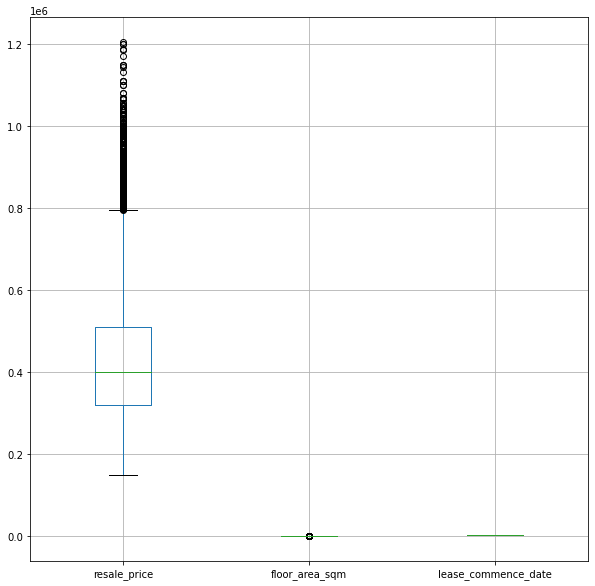

In [4]:
df.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'resale_price'}>,
        <AxesSubplot:title={'center':'floor_area_sqm'}>],
       [<AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:>]], dtype=object)

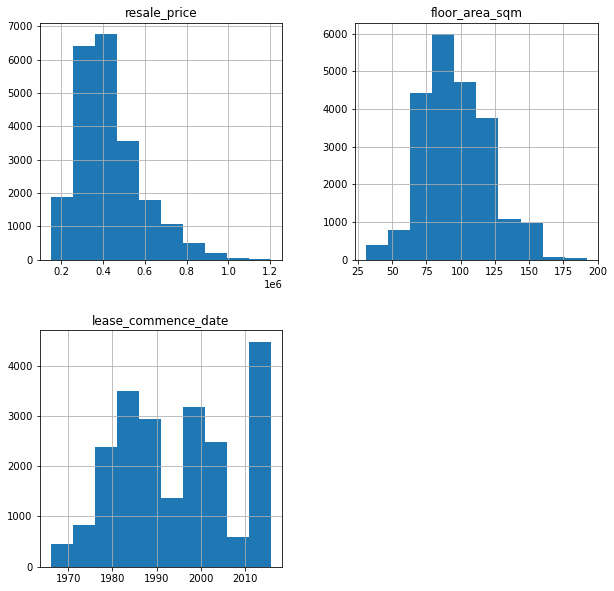

In [5]:
df.hist(figsize=(10,10))

<AxesSubplot:>

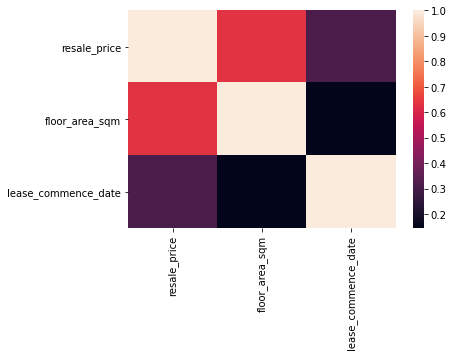

In [6]:
import seaborn as sns
sns.heatmap(df.corr())

In [7]:
dummy=pd.get_dummies(df['town'])
df=df.merge(dummy,left_index=True,right_index=True).drop(columns='town')

dummy=pd.get_dummies(df['flat_type'])
df=df.merge(dummy,left_index=True,right_index=True).drop(columns='flat_type')

dummy=pd.get_dummies(df['flat_model'])
df=df.merge(dummy,left_index=True,right_index=True).drop(columns='flat_model')

# dummy=pd.get_dummies(df['lease_commence_date'])
# df=df.merge(dummy,left_index=True,right_index=True).drop(columns='lease_commence_date')

df.head()

,resale_price,floor_area_sqm,lease_commence_date,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,270000.0,68.0,1981,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,295000.0,73.0,1976,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,270000.0,67.0,1978,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,230000.0,67.0,1978,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,262500.0,68.0,1981,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,resale_price,floor_area_sqm,lease_commence_date,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
count,2.220400e+04,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,...,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000,22204.000000
mean,4.320591e+05,97.075545,1994.459827,0.042965,0.051702,0.018780,0.039362,0.039723,0.042200,0.003198,...,0.000631,0.137633,0.095568,0.000180,0.000180,0.041884,0.029139,0.000631,0.001666,0.000721
std,1.539752e+05,24.356244,13.218726,0.202783,0.221431,0.135752,0.194460,0.195311,0.201049,0.056458,...,0.025103,0.344522,0.294005,0.013421,0.013421,0.200329,0.168200,0.025103,0.040788,0.026835
min,1.500000e+05,31.000000,1966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,77.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000e+05,94.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.100000e+05,112.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.205000e+06,192.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from scipy import stats #标准化
df['floor_area_sqm']=stats.zscore(df['floor_area_sqm'])

In [10]:
X=df.drop(columns='resale_price')
Y=df['resale_price']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is : ",mean_squared_error(Y_test,pred)**0.5)

rmse is :  62455.431314234185


In [13]:
from sklearn import tree
model=tree.DecisionTreeRegressor(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is : ",mean_squared_error(Y_test,pred)**0.5)

rmse is :  43711.16010257397


In [14]:
from sklearn import ensemble
model=ensemble.RandomForestRegressor(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is : ",mean_squared_error(Y_test,pred)**0.5)

rmse is :  40131.48387287037


In [15]:
model=ensemble.GradientBoostingRegressor(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is : ",mean_squared_error(Y_test,pred)**0.5)

rmse is :  62325.73754141881


In [16]:
from sklearn import neural_network
model=neural_network.MLPRegressor(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is : ",mean_squared_error(Y_test,pred)**0.5)

rmse is :  151107.6835284498


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
df.to_csv('Completed_ResaleFlatPrice.csv')

In [18]:
df

,resale_price,floor_area_sqm,lease_commence_date,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,270000.0,-1.193788,1981,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,295000.0,-0.988498,1976,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,270000.0,-1.234846,1978,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,230000.0,-1.234846,1978,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,262500.0,-1.193788,1981,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22199,580000.0,1.844515,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22200,565000.0,2.008748,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22201,633000.0,2.747795,1992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22202,788888.0,2.747795,1992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Qestion: How to improve the results by change the features selected, data wrangling or parameter setting including using keras and tensorflow.**<br>
First, I try to build a neural network with 2 hidden layer by using keras.

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(54,input_dim=54,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(54,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))
model.add(Dropout(0.2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 54)                2970      
                                                                 
 dropout (Dropout)           (None, 54)                0         
                                                                 
 dense_1 (Dense)             (None, 54)                2970      
                                                                 
 dropout_1 (Dropout)         (None, 54)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 55        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 5,995
Trainable params: 5,995
Non-trainabl

In [20]:
import matplotlib.pylab as plt

In [21]:
model.compile(loss="mse",optimizer="adam",metrics=["mse"])
history = model.fit(X_train,Y_train,batch_size=2,epochs=30)

Epoch 1/30
8327/8327 [==============================] - 7s 735us/step - loss: 68794245120.0000 - mse: 68794245120.0000
Epoch 2/30
8327/8327 [==============================] - 6s 697us/step - loss: 62918090752.0000 - mse: 62918090752.0000
Epoch 3/30
8327/8327 [==============================] - 6s 686us/step - loss: 62650814464.0000 - mse: 62650814464.0000
Epoch 4/30
8327/8327 [==============================] - 6s 694us/step - loss: 60596269056.0000 - mse: 60596269056.0000
Epoch 5/30
8327/8327 [==============================] - 6s 692us/step - loss: 62151774208.0000 - mse: 62151774208.0000
Epoch 6/30
8327/8327 [==============================] - 6s 687us/step - loss: 60913086464.0000 - mse: 60913086464.0000
Epoch 7/30
8327/8327 [==============================] - 6s 696us/step - loss: 59022270464.0000 - mse: 59022270464.0000
Epoch 8/30
8327/8327 [==============================] - 6s 698us/step - loss: 55891959808.0000 - mse: 55891959808.0000
Epoch 9/30
8327/8327 [==========================

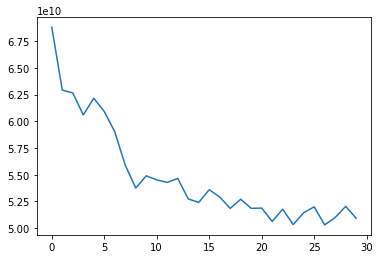

In [22]:
plt.plot(history.history["mse"])

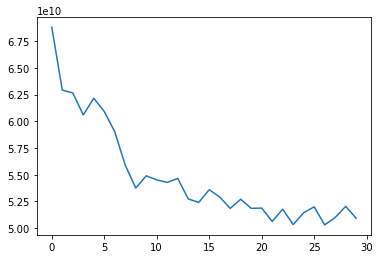

In [23]:
plt.plot(history.history["loss"])

In [24]:
model.evaluate(X_test,Y_test)

174/174 [==============================] - 0s 567us/step - loss: 17203488768.0000 - mse: 17203488768.0000


[17203488768.0, 17203488768.0]

However, based on the mean square error, we can conclude that the prediction result using keras is not very accurate. 

Considering that neural network has so many hyperparameters and is hard to explain the model, I will try to **improve the Random Forest model** since it has lowest rmse (40131) from previous analysis. I will try to find better parameters for the improved model. I choose **n_estimators, min_samples_split, and max_depth** because I think that these three parameters decide the tree structure a lot. I will use **bayesian optimization** to find the best parameters.

In [25]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

rf = ensemble.RandomForestRegressor()
def rf_cv(n_estimators, min_samples_split, max_depth):
    val = cross_val_score(
        ensemble.RandomForestRegressor(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_depth=int(max_depth),
            random_state=2
        ),
        X_train, Y_train, scoring='neg_mean_squared_error', cv=5
    ).mean()
    return val

rf_bo = BayesianOptimization(
        rf_cv,
        {'n_estimators': (10, 300),
        'min_samples_split': (2, 25),
        'max_depth': (5, 35)}
    )

rf_bo.maximize()

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        | -1.817e+0 |  22.06    |  11.91    |  195.1    |
|  2        | -1.853e+0 |  31.56    |  21.12    |  234.2    |
|  3        | -3.699e+0 |  11.9     |  14.51    |  118.6    |
|  4        | -3.325e+0 |  12.23    |  4.949    |  169.0    |
|  5        | -1.697e+0 |  25.07    |  10.24    |  115.9    |
|  6        | -7.831e+0 |  5.287    |  14.75    |  34.15    |
|  7        | -1.873e+0 |  21.48    |  11.28    |  195.3    |
|  8        | -7.817e+0 |  5.0      |  25.0     |  270.3    |
|  9        | -1.61e+09 |  35.0     |  2.0      |  90.8     |
|  10       | -1.899e+0 |  34.97    |  24.56    |  150.2    |
|  11       | -1.604e+0 |  35.0     |  2.0      |  216.5    |
|  12       | -1.886e+0 |  34.92    |  23.57    |  106.9    |
|  13       | -1.607e+0 |  35.0     |  2.0      |  133.9    |
|  14       | -1.9e+09  |  34.96    |  24.96    |  217.0    |
|  15   

In [26]:
rf_bo.max

{'target': -1596548071.5149102,
 'params': {'max_depth': 34.51820639667828,
  'min_samples_split': 4.9432957907733375,
  'n_estimators': 180.93630681362876}}

In [27]:
model_ip=ensemble.RandomForestRegressor(max_depth=34,min_samples_split=5,n_estimators=180)
model_ip.fit(X_train,Y_train)
pred_ip=model_ip.predict(X_test)
print("test rmse is : ",mean_squared_error(Y_test,pred_ip)**0.5)
pred_ip=model_ip.predict(X_train)
print("train rmse is : ",mean_squared_error(Y_train,pred_ip)**0.5)

test rmse is :  39985.34894566402
train rmse is :  30384.12592154576


From the previous analysis, we can conclude that by using bayesian optimization, we find a group of better parameters and improve the accuracy of the model since the value of rmse becomes smaller (drop to 39985).

However, I am not satisfied with this result. So I used autogluon to build a new model. Autogluon is based on auto machine learning structure. It can automatically conduct feature engineering, choose appropriate machine learning model and train the dataset. Generally, it applies the idea of stacking which uses different models and weights their results for an output.

In [28]:
from autogluon.tabular import TabularDataset,TabularPredictor

In [29]:
df_ip=pd.read_csv('ResaleFlatPrice.csv')
df_ip=df_ip[['resale_price','town', 'flat_type','floor_area_sqm','flat_model', 'lease_commence_date']]

In [30]:
rows, cols = df_ip.shape
split_index = int(rows * 0.8)
df_train=df_ip.iloc[0: split_index, :]
df_test= df_ip.iloc[split_index:, :]
df_train.head()

,resale_price,town,flat_type,floor_area_sqm,flat_model,lease_commence_date
0,270000.0,ANG MO KIO,3 ROOM,68.0,New Generation,1981
1,295000.0,ANG MO KIO,3 ROOM,73.0,New Generation,1976
2,270000.0,ANG MO KIO,3 ROOM,67.0,New Generation,1978
3,230000.0,ANG MO KIO,3 ROOM,67.0,New Generation,1978
4,262500.0,ANG MO KIO,3 ROOM,68.0,New Generation,1981


In [31]:
Y_test=df_test.iloc[:,0]
Y_test

17763    565000.0
17764    565000.0
17765    430000.0
17766    410000.0
17767    560000.0
           ...   
22199    580000.0
22200    565000.0
22201    633000.0
22202    788888.0
22203    618000.0
Name: resale_price, Length: 4441, dtype: float64

In [32]:
train_data=TabularDataset(df_train)
label='resale_price'
predictor=TabularPredictor(label=label).fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20220910_081736/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220910_081736/"
AutoGluon Version:  0.5.2
Python Version:     3.8.5
Operating System:   Darwin
Train Data Rows:    17763
Train Data Columns: 5
Label Column: resale_price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1205000.0, 150000.0, 432253.385, 154783.53295)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7421.81 MB
	Train Data (Original)  Memory Usage: 3.76 MB (0.1% of available memo

In [35]:
pred=predictor.predict(df_test)
print("rmse is : ",mean_squared_error(Y_test,pred)**0.5)

rmse is :  37637.00696061865


In [36]:
Y_train=df_train.iloc[:,0]
Y_train
pred_t=predictor.predict(df_train)
print("rmse is : ",mean_squared_error(Y_train,pred_t)**0.5)

rmse is :  32446.39969217494


The rmse drops to 37637. We can conclude that this new model is better than all of the previous models for house price prediction.

**Qualitatively, explain the pros and cons about your model. How to overcome the weakness of your model (future study)**<br>
*For neural network using keras:*<br>
Pros: We can design the structure of the neural network by ourselves. Do not need feature engineering.<br>
Cons: The mse value is very huge. Need to find better hyperparameters, the time of training a model is long.<br>
Overcome: Use grid search or bayesian optimization to find better hyperparameters.

*For Random Forest bayesian optimization:*<br>
Pros: High accuracy (Low rmse). Have randomness when building the model, so less likely to overfit.<br>
Cons: When the number of decision trees in random forest is large, the space and time required for training will be large, which might slower the model.<br>
Overcome: I think this method is nearly the best based on my current knowledge. Setting more bayesian iterations can find better parameters, but might lead to overfitting.

*For Autogluon model:*<br>
Pros: It can automatically conduct feature engineering, choose appropriate machine learning model and train the dataset. Generally, it applies the idea of stacking which uses different models and weights their results for an output, which improves accuracy and avoid overfitting.<br>
Cons: Hard to explain the model.<br>
Overcome: Autogluon is an open source project, it can be stronger with more functions in the future.

**The important of your model to the bank**<br>
Since my model can predict the sales price of houses with small bias, the bank can use the model to predict the real estate value and set up financial products for the real estate industry. On the other hand, when an individual applies to a bank for a loan, the bank can use this model to estimate the value of the individual's house and sign a home mortgage loan, which reduces the risk of bank lending.